In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras

import input_and_processing as iap

from PIL import Image

In [12]:
(train_img, train_labels), (test_img, test_labels), t_img, result_test_df = iap.my_input_and_processing()

In [13]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

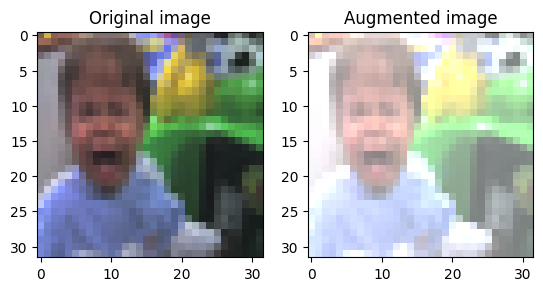

In [14]:
im = Image.fromarray((train_img[0] * 255).astype(np.uint8)).convert('RGB')

flipped_1 = tf.image.flip_left_right(im)
flipped_2 = tf.image.rgb_to_grayscale(im)
flipped_3 = tf.image.adjust_saturation(im, 3)
flipped_4 = tf.image.adjust_brightness(im, 0.4)
flipped_5 = tf.image.central_crop(im, central_fraction=0.5)
flipped_6 = tf.image.rot90(im)
visualize(im, flipped_4)

In [15]:
flip_1 = np.empty(shape=(train_img.shape[0], 32, 32, 3))
flip_2 = np.empty(shape=(train_img.shape[0], 32, 32, 3))
flip_3 = np.empty(shape=(train_img.shape[0], 32, 32, 3))
flip_4 = np.empty(shape=(train_img.shape[0], 32, 32, 3))
flip_5 = np.empty(shape=(train_img.shape[0], 16, 16, 3))
flip_6 = np.empty(shape=(train_img.shape[0], 32, 32, 3))
for i in range(train_img.shape[0]):
    mm = tf.image.flip_left_right(Image.fromarray((train_img[i] * 255).astype(np.uint8)).convert('RGB'))
    flip_1[i] = mm.numpy() / 255.0

    mm = tf.image.rgb_to_grayscale(Image.fromarray((train_img[i] * 255).astype(np.uint8)).convert('RGB'))
    flip_2[i] = mm.numpy() / 255.0

    mm = tf.image.adjust_saturation(Image.fromarray((train_img[i] * 255).astype(np.uint8)).convert('RGB'), 3)
    flip_3[i] = mm.numpy() / 255.0

    mm = tf.image.adjust_brightness(Image.fromarray((train_img[i] * 255).astype(np.uint8)).convert('RGB'), 0.4)
    flip_4[i] = mm.numpy() / 255.0

    mm = tf.image.central_crop(Image.fromarray((train_img[i] * 255).astype(np.uint8)).convert('RGB'), central_fraction=0.5)
    flip_5[i] = mm.numpy() / 255.0

    mm = tf.image.rot90(Image.fromarray((train_img[i] * 255).astype(np.uint8)).convert('RGB'))
    flip_6[i] = mm.numpy() / 255.0

flip_1.shape

(800, 32, 32, 3)

In [16]:
train_img_np = np.concatenate((flip_1, flip_2, flip_3, flip_4, flip_6), axis=0)

train_label_np = np.tile(train_labels, (1, 5))
train_label_np = train_label_np.reshape(-1)

In [17]:
flip_1 = np.empty(shape=(test_img.shape[0], 32, 32, 3))
flip_2 = np.empty(shape=(test_img.shape[0], 32, 32, 3))
flip_3 = np.empty(shape=(test_img.shape[0], 32, 32, 3))
flip_4 = np.empty(shape=(test_img.shape[0], 32, 32, 3))
flip_5 = np.empty(shape=(test_img.shape[0], 16, 16, 3))
flip_6 = np.empty(shape=(test_img.shape[0], 32, 32, 3))
for i in range(test_img.shape[0]):
    mm = tf.image.flip_left_right(Image.fromarray((test_img[i] * 255).astype(np.uint8)).convert('RGB'))
    flip_1[i] = mm.numpy() / 255.0

    mm = tf.image.rgb_to_grayscale(Image.fromarray((test_img[i] * 255).astype(np.uint8)).convert('RGB'))
    flip_2[i] = mm.numpy() / 255.0

    mm = tf.image.adjust_saturation(Image.fromarray((test_img[i] * 255).astype(np.uint8)).convert('RGB'), 3)
    flip_3[i] = mm.numpy() / 255.0

    mm = tf.image.adjust_brightness(Image.fromarray((test_img[i] * 255).astype(np.uint8)).convert('RGB'), 0.4)
    flip_4[i] = mm.numpy() / 255.0

    mm = tf.image.central_crop(Image.fromarray((test_img[i] * 255).astype(np.uint8)).convert('RGB'), central_fraction=0.5)
    flip_5[i] = mm.numpy() / 255.0

    mm = tf.image.rot90(Image.fromarray((test_img[i] * 255).astype(np.uint8)).convert('RGB'))
    flip_6[i] = mm.numpy() / 255.0

flip_1.shape

(212, 32, 32, 3)

In [18]:
test_img_np = np.concatenate((flip_1, flip_2, flip_3, flip_4, flip_6), axis=0)

test_label_np = np.tile(test_labels, (1, 5))
test_label_np = test_label_np.reshape(-1)

In [19]:
ttt_img = t_img[:, :, :, :3]

Обучение CNN

In [77]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    # keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    # keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    # keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(512, 
                        kernel_regularizer=keras.regularizers.L1L2(l1=0.001, l2=0.0001),
                        bias_regularizer=keras.regularizers.L2(0.001),
                        activity_regularizer=keras.regularizers.L2(0.001),
                        activation='relu'),
    keras.layers.Dense(256, 
                        # kernel_regularizer=keras.regularizers.L1L2(l1=0.1, l2=0.1),
                        # bias_regularizer=keras.regularizers.L2(0.1),
                        # activity_regularizer=keras.regularizers.L2(0.1),
                        activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy'])

history = model.fit(train_img_np, train_label_np, epochs=15, validation_data=(test_img_np, test_label_np))

test_loss, test_acc = model.evaluate(test_img_np, test_label_np)
print('Test metric:', test_acc)

predictions = model.predict(ttt_img)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - loss: 8.9640 - sparse_categorical_crossentropy: 0.6635 - val_loss: 0.7071 - val_sparse_categorical_crossentropy: 0.6202
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 0.7163 - sparse_categorical_crossentropy: 0.6420 - val_loss: 0.7261 - val_sparse_categorical_crossentropy: 0.6263
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - loss: 0.7261 - sparse_categorical_crossentropy: 0.6483 - val_loss: 0.6859 - val_sparse_categorical_crossentropy: 0.6246
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 0.7057 - sparse_categorical_crossentropy: 0.6437 - val_loss: 0.6857 - val_sparse_categorical_crossentropy: 0.6250
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - loss: 0.7129 - sparse_categorical_crossentropy: 0.6512 - val_loss: 0.6856 - val_sparse_categorical_crossentropy: 0.6247
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.7029 - sparse_categorical_crossentropy: 0.6411 - val_los

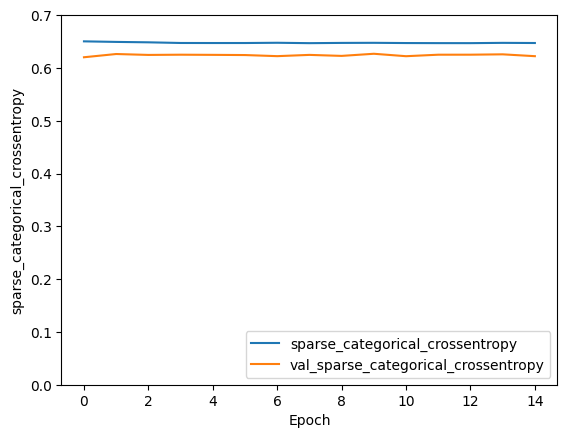

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_crossentropy'], label='sparse_categorical_crossentropy')
plt.plot(history.history['val_sparse_categorical_crossentropy'], label = 'val_sparse_categorical_crossentropy')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')

In [ ]:
num = 6

iap.my_output_processing(result_test_df, predictions, num)

1. Другая функция активации
2. Другой размер батча
3. BatchNormalisation в конце только
4. Уменьшение сложности
5. Использование предобученных моделей
6. Оптимизаторы и изменение скорости обучения